# %%%title%%% %%%title2%%%

In [61]:
%config InlineBackend.figure_formats = ['svg']
%run ../coronavirus.py

In [64]:
def overview(country, region=None, subregion=None, savefig=False):
    c, d = get_country_data(country, region=region, subregion=subregion)
    print("1: ", d.count())

    fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=False)
    ax = axes[0]
    plot_time_step(ax=ax, series=c, style="-C1")
    plot_time_step(ax=ax, series=d, style="-C0")

    ax = axes[1]
    plot_change_bar(ax=ax, series=c, rolling=7, color="C1")
    if country == "China":
        ax.set_ylim(0, 5000)
    print("2: ", d.count())

    ax = axes[2]
    plot_change_bar(ax=ax, series=d, rolling=7, color="C0")
    print("3  : ", c.count(), d.count())

    ax = axes[3]
    plot_growth_factor(ax, series=d, color="C0")
    print("4.5: ", c.count(), d.count())
    plot_growth_factor(ax, series=c, color="C1")
    print("4  : ", c.count(), d.count())

    ax = axes[4]
    plot_doubling_time(ax, series=d, color="C0")
    plot_doubling_time(ax, series=c, color="C1")
    print("5: ", d.count(), c.count())

    # enforce same x-axis on all plots
    for i in range(1, 5):
        axes[i].set_xlim(axes[0].get_xlim())
    for i in range(0, 5):
        axes[i].tick_params(left=True, right=True, labelleft=True, labelright=True)
        axes[i].yaxis.set_ticks_position('both')


    title = f"Overview {c.country}, last data point from {c.index[-1].date().isoformat()}"
    axes[0].set_title(title)

    fig.tight_layout(pad=1)
    filename = os.path.join("figures", c.country.replace(" ", "-").replace(",", "-") + '.svg')
    if savefig:
        fig.savefig(filename)

    if not subregion and not region: # i.e. not a region of Germany
        axes_compare, res_c, res_d = make_compare_plot(country)
        return_axes = np.concatenate([axes, axes_compare])

    elif country=="Germany":   # Germany specific plots
        axes_compare, res_c, red_d = make_compare_plot_germany((region, subregion))
        return_axes = np.concatenate([axes, axes_compare])

    fig2 = plt.gcf()

    if savefig:
        filename = os.path.join("figures", c.country.replace(" ", "-").replace(",", "-") + '2.svg')
        fig2.savefig(filename)

    return return_axes, c, d


1:  36
2:  36
3  :  36 36
4.5:  36 36
4  :  36 36
5:  36 36


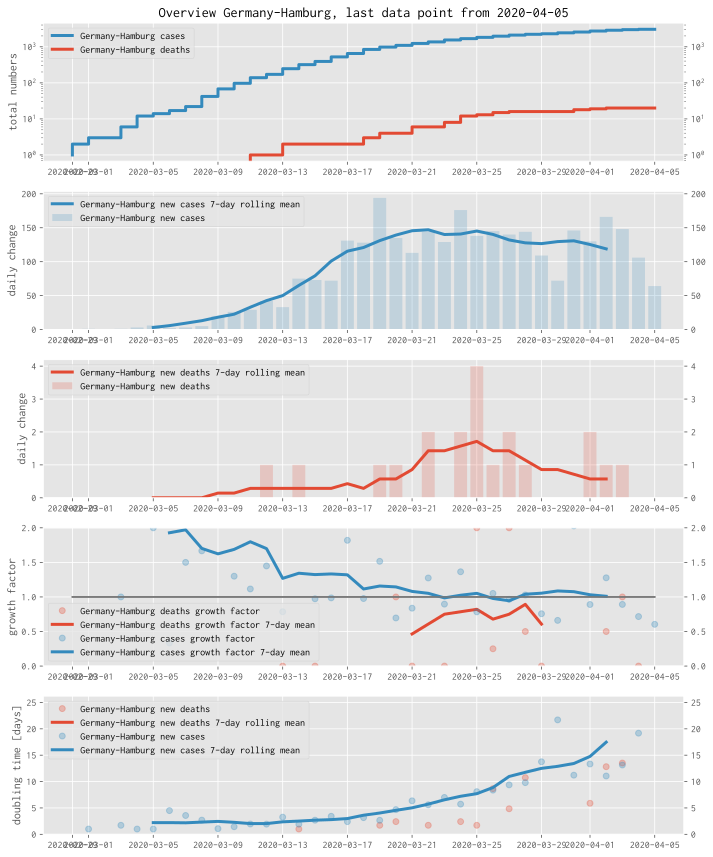

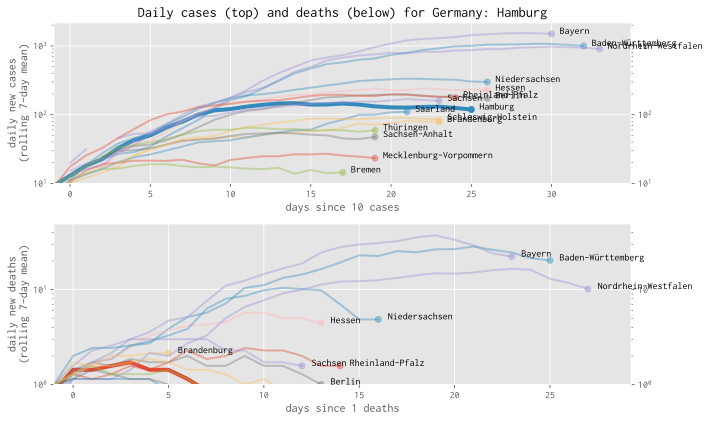

In [65]:
_, cases, deaths = overview("Germany", region="Hamburg")

In [21]:
oe

1

- If you want to execute this notebook, press SHIFT+RETURN to advance code cell to code cell.
- Acknowledgements:
  - great tutorials from https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw
  - Open Source and scientific computing community for the data tools, github for hosting repository
  - Robert Koch Institute provides data for within Germany
  - Johns Hopkins University provides data for countries


In [17]:
c, d = get_country_data("Germany", region="Hamburg")

In [19]:
d

date
2020-02-29 00:00:00+00:00     0
2020-03-01 00:00:00+00:00     0
2020-03-03 00:00:00+00:00     0
2020-03-04 00:00:00+00:00     0
2020-03-05 00:00:00+00:00     0
2020-03-06 00:00:00+00:00     0
2020-03-07 00:00:00+00:00     0
2020-03-08 00:00:00+00:00     0
2020-03-09 00:00:00+00:00     0
2020-03-10 00:00:00+00:00     0
2020-03-11 00:00:00+00:00     0
2020-03-12 00:00:00+00:00     1
2020-03-13 00:00:00+00:00     1
2020-03-14 00:00:00+00:00     2
2020-03-15 00:00:00+00:00     2
2020-03-16 00:00:00+00:00     2
2020-03-17 00:00:00+00:00     2
2020-03-18 00:00:00+00:00     2
2020-03-19 00:00:00+00:00     3
2020-03-20 00:00:00+00:00     4
2020-03-21 00:00:00+00:00     4
2020-03-22 00:00:00+00:00     6
2020-03-23 00:00:00+00:00     6
2020-03-24 00:00:00+00:00     8
2020-03-25 00:00:00+00:00    12
2020-03-26 00:00:00+00:00    13
2020-03-27 00:00:00+00:00    15
2020-03-28 00:00:00+00:00    16
2020-03-29 00:00:00+00:00    16
2020-03-30 00:00:00+00:00    16
2020-03-31 00:00:00+00:00    16
202

In [20]:
deaths

date
2020-02-29 00:00:00+00:00    0
Name: AnzahlTodesfall, dtype: int64

In [14]:
def compose_dataframe_summary(cases, deaths):
    df = pd.DataFrame()
    df["total cases"] = cases
    df["daily new cases"] = cases.diff()
    df["total deaths"] = deaths
    df["daily new deaths"] = deaths.diff()
    return df
    
df = compose_dataframe_summary(cases, deaths)
df

,total cases,daily new cases,total deaths,daily new deaths
date,,,,
2020-02-29 00:00:00+00:00,1,NaN,0.0,NaN
2020-03-09 00:00:00+00:00,42,41.0,NaN,NaN
2020-03-10 00:00:00+00:00,68,26.0,NaN,NaN
2020-03-11 00:00:00+00:00,97,29.0,NaN,NaN
2020-03-12 00:00:00+00:00,139,42.0,NaN,NaN
2020-03-13 00:00:00+00:00,172,33.0,NaN,NaN
2020-03-14 00:00:00+00:00,247,75.0,NaN,NaN
2020-03-15 00:00:00+00:00,320,73.0,NaN,NaN
2020-03-16 00:00:00+00:00,392,72.0,NaN,NaN
